<a href="https://colab.research.google.com/github/deepkick/FOSS4G_Kansai/blob/master/InroductionJP_20191014_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=black> 大規模な地理空間データのディープラーニングの理論と実践 </font>

<center>Lectures: PoliyapramVinayaraj (email: vinay223333@gmail.com) and Ryuhei Hamaguchi (email: ryuhei.hamaguchi@gmail.com )</center></h1>

## Introduction

音声認識、画像認識、自然言語処理（NLP）、ロボットナビゲーションシステムなどのディープラーニング技術の広範な成長性。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/FOSS4G_DeepLearning_HandsOn_datasets/')

#### 人工知能研究センター（AIRC）の簡単な紹介

In [3]:
from IPython.display import Image
Image("fig/AIRC1.png", width=700, height=425)

###### 「地球のグローバルモニタリング」と「スマートモビリティ」でAIを活用する

地球観測衛星の革新的な小型化により、数百のマイクロ衛星で構成される「人工衛星群」が実現しました。 結果として生じる大量の地球画像は、人間の目ではなくAIによって自動的に分析されなければなりません。 商業化を促進するために、地球上のあらゆる種類のオブジェクトやイベントを自動検出することにより、膨大な衛星画像から有益な情報を効率的に収集するインテリジェントシステムを開発しています[1]。

<img src="../fig/AIRC2.png" width=400 >

In [4]:
Image("fig/AIRC2.png", width=600, height=450)

### <font color=black>  リモートセンシングのディープラーニング </font>

データ駆動型の科学と機械学習技術はますます重要になっています。 特に、ディープラーニングは、多くの分野で大きなブレークスルーであり、非常に強力なツールであることが証明されています。 このワークショップの主な目的は、地理空間データアプリケーションのディープラーニングテクニックを紹介することです。

- リモートセンシングデータは、多くの場合、マルチモーダルです（例：光学（マルチおよびハイパースペクトル）、ライダー、および合成開口レーダー（SAR）センサーから）
- リモートセンシングデータは地理的に配置されています。つまり、自然に地理空間に配置されています。
- 時系列処理をトリガーする連続的および時間的観測
- リモートセンシングも「ビッグデータ」の課題に直面しています

### <font color=black> 一般的なアプリケーション </font>

>  **ハイパースペクトル画像分析, 
   SAR画像の分類, 
  マルチモーダルデータ融合, 物体検出,
  3-D 再構築,
  ノイズリダクション,
  ドメイン適応, 次元削減, etc.**

### 1. パーセプトロン学習

パーセプトロンは、入力機能と呼ばれる入力ベクトルx（x1、x2、..、xn）を与え、1または0を出力する、直感的で実装が容易な機械学習アルゴリズムです。パーセプトロンは、教師あり学習アルゴリズムのカテゴリに属します。 より具体的には、単層バイナリ分類器。 パーセプトロンアルゴリズムは、線形に分離可能な2つのクラスを区別できる線形決定境界を描画するために、入力フィーチャの重みを学習することです。

 **単層パーセプトロン**  

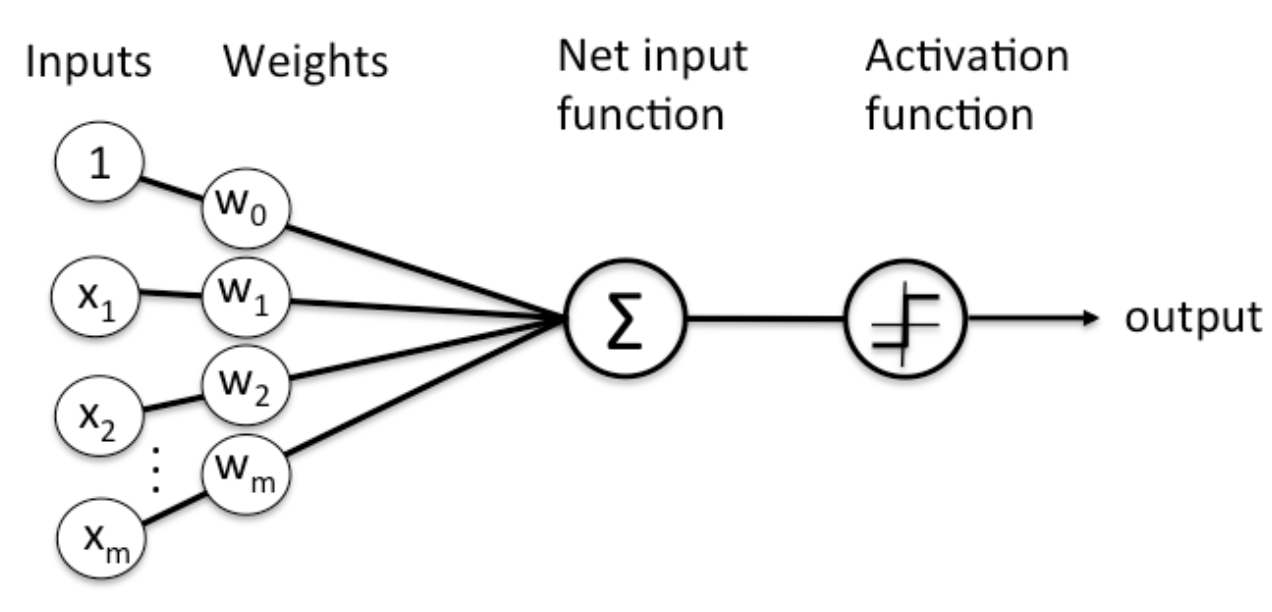

In [5]:
Image("fig/SLP.png", width=800, height=400)

<center>$ Net =  w_1 x_1  +w_2 x_2  + w_3 x_3  + ... + w_m x_m  + b $ </center></h1>

ここで、「Net」は正味積、「w」は重み、「x」は特徴（マルチスペクトル画像「x」がスペクトルバンドである場合）、「b」はバイアスです[2]

\begin{equation*}
Net =  \sum_{i=0}^m w_i x_i + b 
\end{equation*}

**Kerasのいくつかの例を使用してこれを確認しましょう**

In [6]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense

Using TensorFlow backend.


5つの入力変数（スペクトルバンド）があるとします

In [7]:
model = Sequential()
model.add(Dense(1, input_dim=5, kernel_initializer='random_uniform'))

各ニューロンは、ランダムな重み、「random_uniform」、「random_normal」、ゼロなどの初期化するいくつかの
オプションで初期化できます。

In [8]:
print (model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None


初期化されたパラメーター（重みとバイアス）を確認しましょう

In [9]:
weights_bias = model.layers[0].get_weights()

In [10]:
print (weights_bias)

[array([[ 0.01890333],
       [ 0.00098532],
       [ 0.03619994],
       [-0.02140498],
       [ 0.02146748]], dtype=float32), array([0.], dtype=float32)]


**多層パーセプトロン**

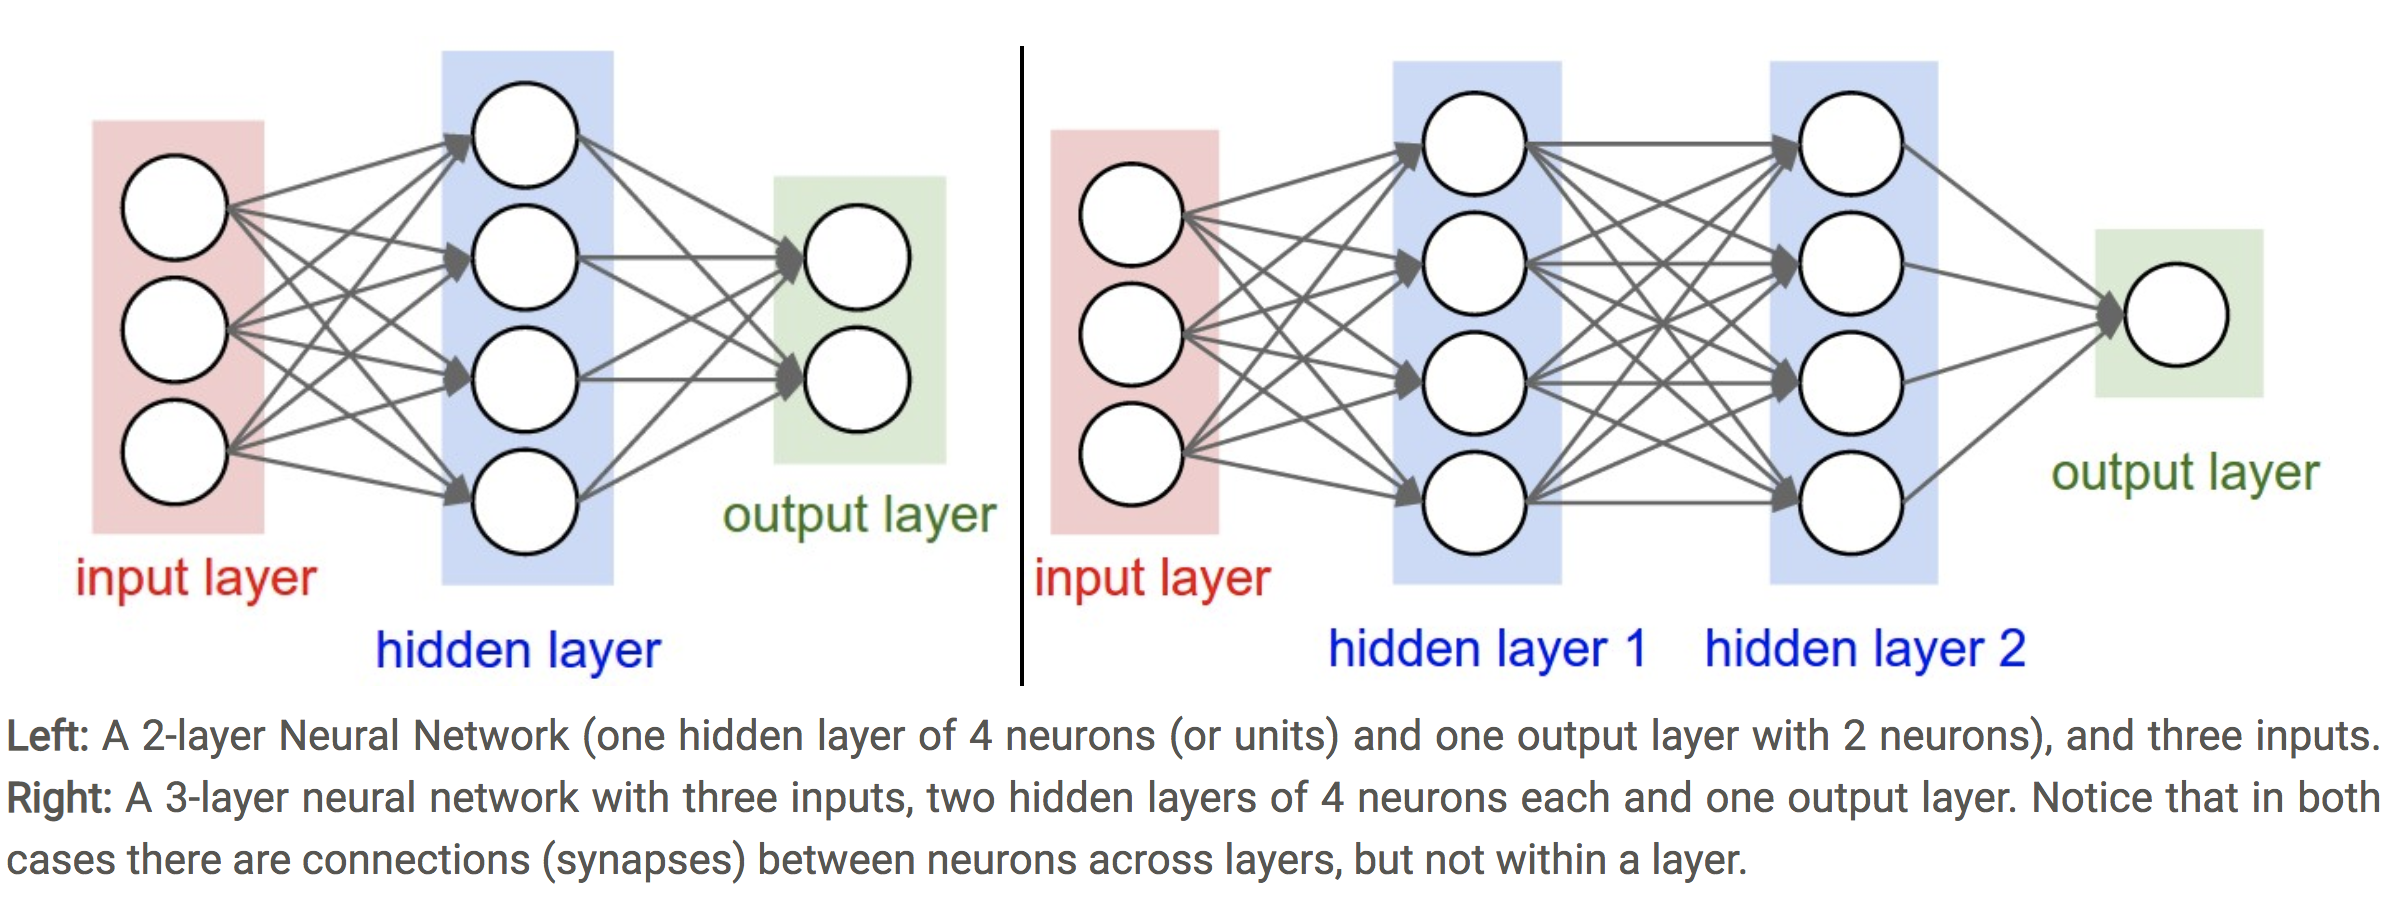

In [16]:
Image("fig/MLP.png", width=1000, height=500)

**ニューラルネットワークのサイズ設定：** ニューラルネットワークのサイズを測定するために一般的に使用される2つのメトリックは、ニューロンの数、またはより一般的にはパラメーターの数です。 上の図の2つのネットワーク例での作業[3]

第1ネットワーク（左）は 4 + 2 = 6 ニューロン（入力をカウントしない）, [3 x 4] + [4 x 2] = 20 ウエイトと 4 + 2 = 6 バイアス, 合計26個の学習可能なパラメーターを持ちます。
第2ネットワーク（右）は  4 + 4 + 1 = 9 ニューロン, [3 x 4] + [4 x 4] + [4 x 1] = 12 + 16 + 4 = 32 ウエイトと 4 + 4 + 1 = 9 バイアス,  合計41個の学習可能なパラメーターを持ちます。 

\begin{equation*}
 Net_j = \sum_{i=0}^m w_ji x_i + b 
\end{equation*}

<center> Where, $ Net_j $ 隠れレイヤーの各ニューロンのネット積です。 <center>

**Kerasのいくつかの例を使用してこれを確認しましょう**

In [0]:
model = Sequential()
model.add(Dense(4, input_dim=3, kernel_initializer='random_uniform'))
model.add(Dense(2))

In [0]:
weights_bias0 = model.layers[0].get_weights()
weights_bias1 = model.layers[1].get_weights()

In [21]:
print (weights_bias0)

[array([[-0.01807567,  0.03258789, -0.01581841, -0.02327664],
       [ 0.03094744,  0.01799924, -0.02974987, -0.04793178],
       [ 0.0203304 , -0.01917028, -0.01283211, -0.02592244]],
      dtype=float32), array([0., 0., 0., 0.], dtype=float32)]


In [22]:
print (weights_bias1)

[array([[ 0.3330021 , -0.58138156],
       [ 0.8488958 ,  0.15550399],
       [ 0.3930447 , -0.02472687],
       [ 0.14430475,  0.37542152]], dtype=float32), array([0., 0.], dtype=float32)]


**参照**

1. National Institute of Advanced Industrial Science and Technology
2. F.ROSENBLATT, THE PERCEPTRON: A PROBABILISTIC MODEL FOR INFORMATION STORAGE AND ORGANIZATION IN THE BRAIN
3. http://cs231n.github.io